In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from matplotlib.pylab import rcParams

In [2]:
import nltk

In [3]:
from wordcloud import WordCloud
import re

In [4]:
from nltk.corpus  import stopwords
from nltk.stem import WordNetLemmatizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [7]:
df=pd.read_csv("train.txt",delimiter=";",names=["text","label"])

In [8]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [9]:
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [10]:
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [11]:
df = pd.concat([df,df_val])
df.reset_index(inplace=True,drop=True)

In [12]:
df

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness
17996,i constantly worry about their fight against n...,joy
17997,i feel its important to share this info for th...,joy
17998,i truly feel that if you are passionate enough...,joy


c:\Users\Twitter\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

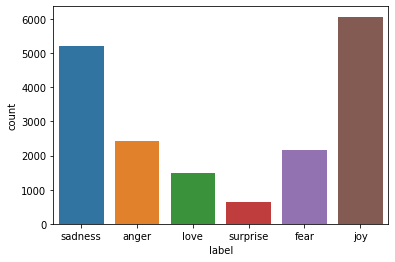

In [13]:
sbs.countplot(df.label)

In [14]:
df["new_label"]=df.label.map({"sadness":0,"anger":0,"fear":0,"love":1,"surprise":1,"joy":1})

In [15]:
df

,text,label,new_label
0,i didnt feel humiliated,sadness,0
1,i can go from feeling so hopeless to so damned...,sadness,0
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,1
4,i am feeling grouchy,anger,0
...,...,...,...
17995,im having ssa examination tomorrow in the morn...,sadness,0
17996,i constantly worry about their fight against n...,joy,1
17997,i feel its important to share this info for th...,joy,1
17998,i truly feel that if you are passionate enough...,joy,1


In [16]:
df=df.drop("label",axis=1)

In [17]:
df

,text,new_label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
17995,im having ssa examination tomorrow in the morn...,0
17996,i constantly worry about their fight against n...,1
17997,i feel its important to share this info for th...,1
17998,i truly feel that if you are passionate enough...,1


c:\Users\Twitter\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='new_label', ylabel='count'>

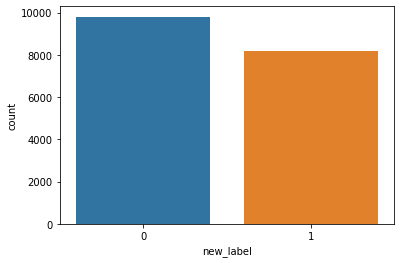

In [18]:
sbs.countplot(df.new_label)

In [19]:
lm = WordNetLemmatizer()

In [20]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [23]:
corpus = text_transformation(df['text'])

In [24]:
corpus

['didnt feel humiliated',
 'go feeling hopeless damned hopeful around someone care awake',
 'im grabbing minute post feel greedy wrong',
 'ever feeling nostalgic fireplace know still property',
 'feeling grouchy',
 'ive feeling little burdened lately wasnt sure',
 'ive taking milligram time recommended amount ive fallen asleep lot faster also feel like funny',
 'feel confused life teenager jaded year old man',
 'petronas year feel petronas performed well made huge profit',
 'feel romantic',
 'feel like make suffering seeing mean something',
 'feel running divine experience expect type spiritual encounter',
 'think easiest time year feel dissatisfied',
 'feel low energy thirsty',
 'immense sympathy general point possible proto writer trying find time write corner life sign agent let alone publishing contract feel little precious',
 'feel reassured anxiety side',
 'didnt really feel embarrassed',
 'feel pretty pathetic time',
 'started feeling sentimental doll child began collection vint

In [25]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Twitter\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

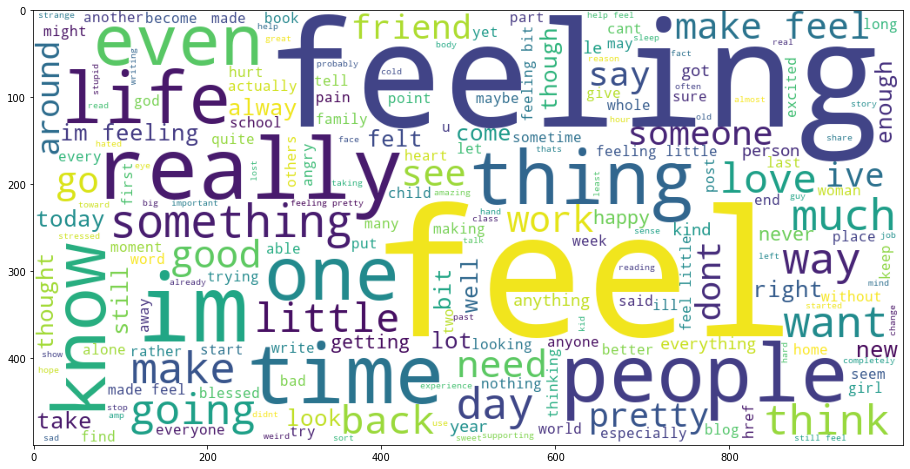

In [26]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [27]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.new_label

In [46]:
from scipy.sparse import csr_matrix

In [45]:
print(csr_matrix(X))

  (0, 23716)	1
  (0, 33108)	1
  (0, 49055)	1
  (0, 23739)	1
  (0, 33809)	1
  (1, 41859)	1
  (1, 34750)	1
  (1, 48175)	1
  (1, 21214)	1
  (1, 48106)	1
  (1, 5280)	1
  (1, 93693)	1
  (1, 13592)	1
  (1, 6622)	1
  (1, 41930)	1
  (1, 35233)	1
  (1, 48185)	1
  (1, 21217)	1
  (1, 48108)	1
  (1, 5441)	1
  (1, 93713)	1
  (1, 13600)	1
  (2, 33108)	1
  (2, 49968)	1
  (2, 43324)	1
  :	:
  (17998, 106702)	1
  (17998, 96321)	1
  (17998, 28795)	1
  (17998, 74770)	1
  (17998, 94107)	1
  (17998, 106668)	1
  (17999, 33108)	1
  (17999, 58628)	1
  (17999, 33931)	1
  (17999, 63624)	1
  (17999, 72230)	1
  (17999, 88747)	1
  (17999, 29506)	1
  (17999, 72636)	1
  (17999, 12722)	1
  (17999, 20924)	1
  (17999, 111237)	1
  (17999, 20952)	1
  (17999, 29723)	1
  (17999, 59863)	1
  (17999, 111238)	1
  (17999, 12730)	1
  (17999, 63855)	1
  (17999, 88917)	1
  (17999, 72644)	1


In [28]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_